# Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom. Dữ liệu lấy tại
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

## Bài làm

### 1. Import thư viện và nạp dữ liệu

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # Thêm thư viện để vẽ ma trận nhầm lẫn
import matplotlib.pyplot as plt

In [2]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
data = pd.read_csv('../data/2.3.4 Bài tập thực hành 2/mushrooms.csv', encoding='latin-1')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Xử lý dữ liệu

In [9]:
# 2.1 Xử lý giá trị thiếu ('?') trong 'stalk-root'
mode = data[data['stalk-root'] != '?']['stalk-root'].mode()[0]
data['stalk-root'] = data['stalk-root'].replace('?', mode)

In [11]:
# 2.2 Separate features (X) and target labels (y)
# Target (y) của chúng ta là 'class'
# p = poisonous (độc) = 1, e = edible (ăn được) = 0
y = data['class'].map({'p': 1, 'e': 0})
    
# Features (X) là tất cả các cột còn lại
X = data.drop('class', axis=1)

### 3. Vector hóa

In [14]:
# Chúng ta biến đổi tất cả 22 cột feature thành các cột 0/1
X_vectorized = pd.get_dummies(X, drop_first=True)
    
print(f"Số lượng features ban đầu: {len(X.columns)}")
print(f"Số lượng features sau khi vector hóa: {len(X_vectorized.columns)}")

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
print(f"Đã chia dữ liệu: {len(X_train)} train, {len(X_test)} test.")

Số lượng features ban đầu: 22
Số lượng features sau khi vector hóa: 94
Đã chia dữ liệu: 6499 train, 1625 test.


### 4. Xây dựng mô hình Naïve Bayes

In [16]:
# (Dùng MultinomialNB vì X_vectorized là dữ liệu đếm 0/1)
if 'data' in locals():
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train) # Huấn luyện trên dữ liệu vector hóa

### 5. Đánh giá hiệu quả của mô hình


--- 5. Đánh giá hiệu quả mô hình ---
Accuracy: 0.9514
Confusion Matrix:
[[835   8]
 [ 71 711]]
Classification Report:
                  precision    recall  f1-score   support

Edible (Ăn được)       0.92      0.99      0.95       843
 Poisonous (Độc)       0.99      0.91      0.95       782

        accuracy                           0.95      1625
       macro avg       0.96      0.95      0.95      1625
    weighted avg       0.95      0.95      0.95      1625



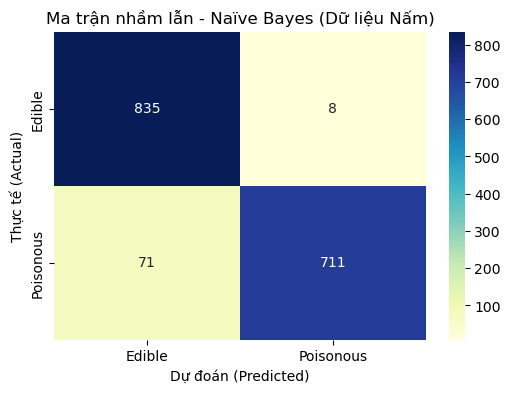

In [17]:
if 'data' in locals():
    print("\n--- 5. Đánh giá hiệu quả mô hình ---")
    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=['Edible (Ăn được)', 'Poisonous (Độc)'])
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    
    # Vẽ ma trận nhầm lẫn cho đẹp hơn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", 
                xticklabels=['Edible', 'Poisonous'], 
                yticklabels=['Edible', 'Poisonous'])
    plt.title('Ma trận nhầm lẫn - Naïve Bayes (Dữ liệu Nấm)')
    plt.xlabel('Dự đoán (Predicted)')
    plt.ylabel('Thực tế (Actual)')
    plt.show()

In [18]:
!jupyter nbconvert --to html "2.3.4 Bài tập thực hành 2.ipynb"

[NbConvertApp] Converting notebook 2.3.4 Bài tập thực hành 2.ipynb to html
[NbConvertApp] Writing 285854 bytes to 2.3.4 Bài tập thực hành 2.html
